# **PLANT DISEASE PREDICTION BY SAKSHI SRIVASTAVA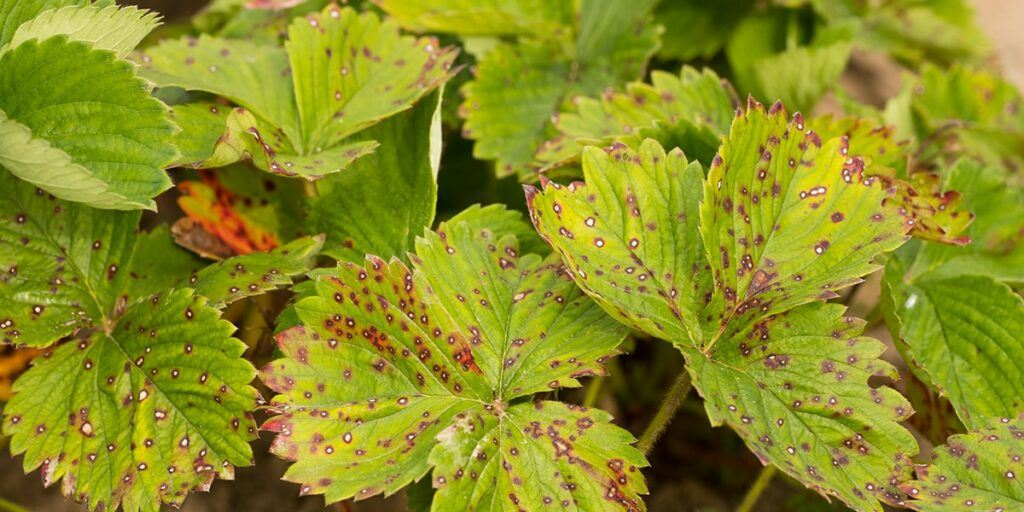**

**IMPORTING LIBRARIES**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sakshi1922","key":"070b3383018884414ac50b01ce8f2bd8"}'}

In [3]:
!mkdir -p ~/.kaggle          # Create hidden kaggle folder
!cp kaggle.json ~/.kaggle/   # Move your json file
!chmod 600 ~/.kaggle/kaggle.json  # Secure it

**LOADING DATASET**

In [4]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [5]:
!unzip new-plant-diseases-dataset.zip -d plant_disease_data

Streaming output truncated to the last 5000 lines.
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: plant_disease_data/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d

**Test set Image Processing**

In [6]:
valid_dir = 'plant_disease_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

**Loading Model**

In [10]:
import os
os.path.exists('/content/trained_plant_disease_model.keras')


True

In [19]:
import os
print(os.listdir('/content'))


['.config', 'plant_disease_data', 'new-plant-diseases-dataset.zip', 'kaggle.json', 'trained_plant_disease_model (1).keras', 'trained_plant_disease_model.keras', 'sample_data']


In [12]:
from google.colab import files
uploaded = files.upload()


Saving trained_plant_disease_model.keras to trained_plant_disease_model (1).keras


In [13]:
import zipfile

print(zipfile.is_zipfile('/content/trained_plant_disease_model.keras'))


True


In [15]:
cnn = tf.keras.models.load_model('/content/trained_plant_disease_model.keras')

**Visualising and Performing Prediction on Single image**

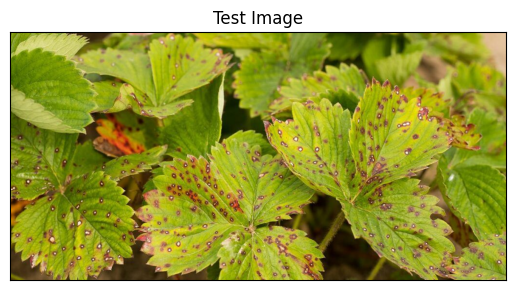

In [24]:
#Test Image Visualization
import cv2
image_path = '/content/leaf.jpg'
#'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

**Testing Model**

In [25]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [26]:
print(predictions)

[[2.9908778e-10 8.0417470e-12 5.7438897e-12 1.5340551e-14 1.6661797e-14
  5.1994384e-11 1.2224731e-13 8.1082799e-05 2.5831171e-06 1.5671798e-05
  8.0335946e-11 1.3031421e-08 1.3786065e-09 9.1163620e-06 1.3408248e-13
  1.8437715e-11 1.3319211e-06 1.9703380e-13 4.6238657e-08 8.4347172e-13
  6.0550205e-09 1.7764135e-12 7.8400125e-12 7.4198581e-12 6.0239032e-14
  3.4713953e-08 9.9988222e-01 1.0144935e-15 4.6059051e-10 7.7845389e-06
  6.3568578e-10 1.4223103e-14 8.2399920e-12 1.7759442e-14 2.8928167e-13
  1.0635509e-12 3.5827931e-15 4.6452527e-14]]


In [27]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

26


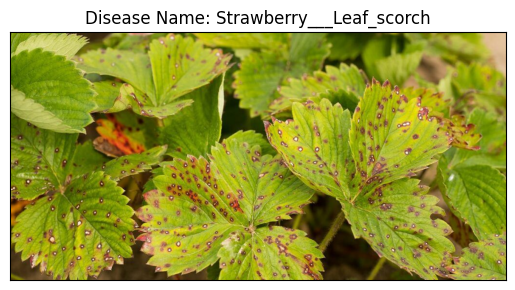

In [28]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

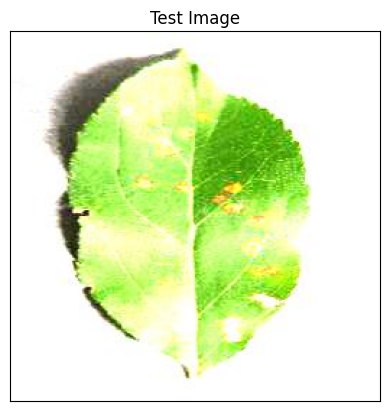

In [30]:

#Test Image Visualization
import cv2
image_path = 'plant_disease_data/test/test/AppleCedarRust1.JPG'
#'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


In [32]:
print(predictions)

[[5.37914921e-08 3.04636671e-08 9.99871373e-01 7.75312092e-10
  1.07565604e-07 2.05584749e-09 2.61273975e-10 2.38874431e-09
  3.44784312e-10 3.01449664e-11 1.85814295e-13 7.99615805e-08
  9.12440401e-10 1.10621134e-09 1.49565083e-09 5.17495957e-09
  2.68161848e-08 1.94212184e-08 1.05530062e-09 9.11156164e-08
  8.71374015e-11 1.26960631e-09 6.03130559e-08 1.33867486e-08
  1.28101155e-10 2.55815542e-11 1.62315994e-10 3.00672903e-10
  8.83022585e-06 3.86858374e-05 6.83071339e-05 8.16528345e-10
  2.30702403e-06 2.84298207e-09 4.16254807e-06 4.07208091e-07
  4.00591716e-06 1.33078811e-06]]


In [33]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


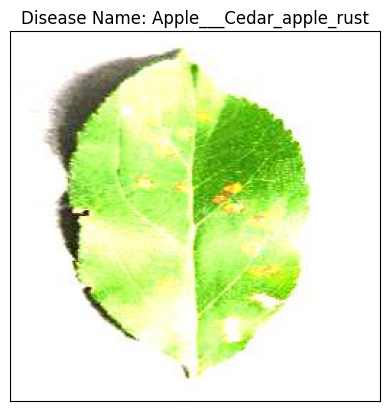

In [34]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()